In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical, plot_model
from keras import optimizers, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Using TensorFlow backend.
/Users/stephaniewalsh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/stephaniewalsh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/stephaniewalsh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/stephaniewalsh/anacond

In [2]:
train = pd.read_csv('../titanic/cleaned_train.csv')

In [3]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [4]:
data = train.to_numpy()
X = data[:,1:]
y = data[:,0]
# y = to_categorical(y,num_classes=2)
X.shape

(889, 8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state = 42)

In [6]:
model = Sequential()
model.add(Dense(32,input_dim=8,activation='sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 89 samples
Epoch 1/50
800/800 [==============================] - 0s 224us/step - loss: 0.9203 - accuracy: 0.3613 - val_loss: 0.8682 - val_accuracy: 0.4045
Epoch 2/50
800/800 [==============================] - 0s 25us/step - loss: 0.8328 - accuracy: 0.3550 - val_loss: 0.7960 - val_accuracy: 0.3820
Epoch 3/50
800/800 [==============================] - 0s 20us/step - loss: 0.7700 - accuracy: 0.3363 - val_loss: 0.7488 - val_accuracy: 0.3708
Epoch 4/50
800/800 [==============================] - 0s 29us/step - loss: 0.7296 - accuracy: 0.3562 - val_loss: 0.7173 - val_accuracy: 0.3483
Epoch 5/50
800/800 [==============================] - 0s 21us/step - loss: 0.7035 - accuracy: 0.4450 - val_loss: 0.6956 - val_accuracy: 0.4831
Epoch 6/50
800/800 [==============================] - 0s 34us/step - loss: 0.6859 - accuracy: 0.5788 - val_loss: 0.6796 - val_accuracy: 0.6067
Epoch 7/50
800/800 [============================

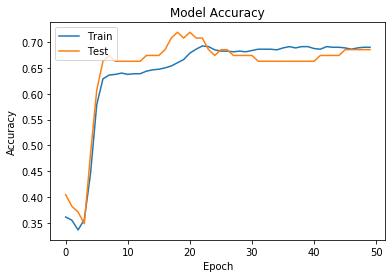

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [11]:
new_model = Sequential()
new_model.add(Dense(1,input_dim=8,activation='sigmoid'))

In [12]:
new_model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history2 = new_model.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/50
800/800 [==============================] - 0s 220us/step - loss: 5.6389 - accuracy: 0.6162 - val_loss: 5.1104 - val_accuracy: 0.6404
Epoch 2/50
800/800 [==============================] - 0s 32us/step - loss: 4.6937 - accuracy: 0.6363 - val_loss: 2.4501 - val_accuracy: 0.6629
Epoch 3/50
800/800 [==============================] - 0s 43us/step - loss: 2.0481 - accuracy: 0.6700 - val_loss: 1.2760 - val_accuracy: 0.6854
Epoch 4/50
800/800 [==============================] - 0s 59us/step - loss: 1.2052 - accuracy: 0.6913 - val_loss: 1.1780 - val_accuracy: 0.5393
Epoch 5/50
800/800 [==============================] - 0s 42us/step - loss: 1.1165 - accuracy: 0.5900 - val_loss: 1.0642 - val_accuracy: 0.6404
Epoch 6/50
800/800 [==============================] - 0s 21us/step - loss: 1.1806 - accuracy: 0.6275 - val_loss: 1.1475 - val_accuracy: 0.4831
Epoch 7/50
800/800 [==============================] - 0s 30us/step - loss: 1.4845 - accuracy: 0.

In [14]:
model_2 = Sequential()
model_2.add(Dense(32,input_dim=8,activation='sigmoid'))
model_2.add(Dense(32,activation='sigmoid'))
model_2.add(Dense(1,activation = 'sigmoid'))

In [15]:
model_2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model_3_history = model_2.fit(X, y, epochs=30, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/30
800/800 [==============================] - 0s 334us/step - loss: 0.6711 - accuracy: 0.6162 - val_loss: 0.6676 - val_accuracy: 0.6292
Epoch 2/30
800/800 [==============================] - 0s 40us/step - loss: 0.6693 - accuracy: 0.6162 - val_loss: 0.6658 - val_accuracy: 0.6292
Epoch 3/30
800/800 [==============================] - 0s 36us/step - loss: 0.6680 - accuracy: 0.6162 - val_loss: 0.6643 - val_accuracy: 0.6292
Epoch 4/30
800/800 [==============================] - 0s 39us/step - loss: 0.6668 - accuracy: 0.6162 - val_loss: 0.6631 - val_accuracy: 0.6292
Epoch 5/30
800/800 [==============================] - 0s 55us/step - loss: 0.6660 - accuracy: 0.6162 - val_loss: 0.6616 - val_accuracy: 0.6292
Epoch 6/30
800/800 [==============================] - 0s 42us/step - loss: 0.6651 - accuracy: 0.6162 - val_loss: 0.6607 - val_accuracy: 0.6292
Epoch 7/30
800/800 [==============================] - 0s 33us/step - loss: 0.6644 - accuracy: 0.

# Change Nodes to 256

In [17]:
model_256 = Sequential()
model_256.add(Dense(256,input_dim=8,activation='sigmoid'))
model_256.add(Dropout(0.2))
model_256.add(Dense(256,activation='sigmoid'))
model_256.add(Dropout(0.2))
model_256.add(Dense(1,activation = 'sigmoid'))

In [18]:
model_256.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model_256_history = model_256.fit(X, y, epochs=60, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/60
800/800 [==============================] - 0s 483us/step - loss: 0.6878 - accuracy: 0.5600 - val_loss: 0.6590 - val_accuracy: 0.6292
Epoch 2/60
800/800 [==============================] - 0s 93us/step - loss: 0.6815 - accuracy: 0.5763 - val_loss: 0.6551 - val_accuracy: 0.6292
Epoch 3/60
800/800 [==============================] - 0s 62us/step - loss: 0.6760 - accuracy: 0.5763 - val_loss: 0.6505 - val_accuracy: 0.6292
Epoch 4/60
800/800 [==============================] - 0s 62us/step - loss: 0.6838 - accuracy: 0.6025 - val_loss: 0.6476 - val_accuracy: 0.6292
Epoch 5/60
800/800 [==============================] - 0s 59us/step - loss: 0.6692 - accuracy: 0.6162 - val_loss: 0.6442 - val_accuracy: 0.6292
Epoch 6/60
800/800 [==============================] - 0s 61us/step - loss: 0.6794 - accuracy: 0.5975 - val_loss: 0.6413 - val_accuracy: 0.6292
Epoch 7/60
800/800 [==============================] - 0s 53us/step - loss: 0.6688 - accuracy: 0.

800/800 [==============================] - 0s 57us/step - loss: 0.6223 - accuracy: 0.6675 - val_loss: 0.5877 - val_accuracy: 0.6629
Epoch 58/60
800/800 [==============================] - 0s 42us/step - loss: 0.6164 - accuracy: 0.6850 - val_loss: 0.5911 - val_accuracy: 0.6742
Epoch 59/60
800/800 [==============================] - 0s 44us/step - loss: 0.6203 - accuracy: 0.6562 - val_loss: 0.5869 - val_accuracy: 0.6629
Epoch 60/60
800/800 [==============================] - 0s 46us/step - loss: 0.6225 - accuracy: 0.6625 - val_loss: 0.5878 - val_accuracy: 0.6629


In [20]:
relu_model = Sequential()
relu_model.add(Dense(256,input_dim=8,activation='relu'))
relu_model.add(Dropout(0.2))
relu_model.add(Dense(256,activation='relu'))
relu_model.add(Dropout(0.2))
relu_model.add(Dense(1,activation = 'sigmoid'))

In [21]:
relu_model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
relu_model_history = relu_model.fit(X, y, epochs=100, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/100
800/800 [==============================] - 0s 506us/step - loss: 1.6042 - accuracy: 0.5400 - val_loss: 1.0532 - val_accuracy: 0.6292
Epoch 2/100
800/800 [==============================] - 0s 76us/step - loss: 1.1232 - accuracy: 0.5875 - val_loss: 0.5947 - val_accuracy: 0.6854
Epoch 3/100
800/800 [==============================] - 0s 88us/step - loss: 0.7815 - accuracy: 0.6413 - val_loss: 0.7768 - val_accuracy: 0.7303
Epoch 4/100
800/800 [==============================] - 0s 104us/step - loss: 0.8637 - accuracy: 0.6575 - val_loss: 1.2090 - val_accuracy: 0.6292
Epoch 5/100
800/800 [==============================] - 0s 63us/step - loss: 0.9138 - accuracy: 0.6288 - val_loss: 0.6889 - val_accuracy: 0.6966
Epoch 6/100
800/800 [==============================] - 0s 55us/step - loss: 0.7430 - accuracy: 0.6475 - val_loss: 0.6916 - val_accuracy: 0.6292
Epoch 7/100
800/800 [==============================] - 0s 52us/step - loss: 0.7396 - accu

800/800 [==============================] - 0s 48us/step - loss: 0.5978 - accuracy: 0.6850 - val_loss: 0.5396 - val_accuracy: 0.7416
Epoch 58/100
800/800 [==============================] - 0s 41us/step - loss: 0.6127 - accuracy: 0.6900 - val_loss: 0.5660 - val_accuracy: 0.6292
Epoch 59/100
800/800 [==============================] - 0s 46us/step - loss: 0.6221 - accuracy: 0.6750 - val_loss: 0.5412 - val_accuracy: 0.7416
Epoch 60/100
800/800 [==============================] - 0s 59us/step - loss: 0.6067 - accuracy: 0.6900 - val_loss: 0.5458 - val_accuracy: 0.7079
Epoch 61/100
800/800 [==============================] - 0s 49us/step - loss: 0.6138 - accuracy: 0.6900 - val_loss: 0.5351 - val_accuracy: 0.7416
Epoch 62/100
800/800 [==============================] - 0s 54us/step - loss: 0.6083 - accuracy: 0.6925 - val_loss: 0.5412 - val_accuracy: 0.7416
Epoch 63/100
800/800 [==============================] - 0s 48us/step - loss: 0.6114 - accuracy: 0.6950 - val_loss: 0.5499 - val_accuracy: 0.707

In [23]:
relu_adam_model = Sequential()
relu_adam_model.add(Dense(256,input_dim=8,activation='relu'))
relu_adam_model.add(Dropout(0.2))
relu_adam_model.add(Dense(256,activation='relu'))
relu_adam_model.add(Dropout(0.2))
relu_adam_model.add(Dense(1,activation = 'sigmoid'))

In [24]:
relu_adam_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
relu_adam_model_history = relu_adam_model.fit(X, y, epochs=100, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/100
800/800 [==============================] - 0s 577us/step - loss: 1.7829 - accuracy: 0.5825 - val_loss: 0.7699 - val_accuracy: 0.6966
Epoch 2/100
800/800 [==============================] - 0s 60us/step - loss: 1.2652 - accuracy: 0.6150 - val_loss: 0.6754 - val_accuracy: 0.6742
Epoch 3/100
800/800 [==============================] - 0s 59us/step - loss: 0.9603 - accuracy: 0.6200 - val_loss: 0.5666 - val_accuracy: 0.6854
Epoch 4/100
800/800 [==============================] - 0s 65us/step - loss: 0.9812 - accuracy: 0.5475 - val_loss: 0.5924 - val_accuracy: 0.6854
Epoch 5/100
800/800 [==============================] - 0s 61us/step - loss: 0.8205 - accuracy: 0.6675 - val_loss: 0.5446 - val_accuracy: 0.6854
Epoch 6/100
800/800 [==============================] - 0s 61us/step - loss: 0.9036 - accuracy: 0.6525 - val_loss: 0.5676 - val_accuracy: 0.7303
Epoch 7/100
800/800 [==============================] - 0s 60us/step - loss: 0.7975 - accur

800/800 [==============================] - 0s 53us/step - loss: 0.5292 - accuracy: 0.7638 - val_loss: 0.4117 - val_accuracy: 0.8202
Epoch 58/100
800/800 [==============================] - 0s 51us/step - loss: 0.5419 - accuracy: 0.7650 - val_loss: 0.4050 - val_accuracy: 0.8315
Epoch 59/100
800/800 [==============================] - 0s 47us/step - loss: 0.5211 - accuracy: 0.7675 - val_loss: 0.4017 - val_accuracy: 0.8315
Epoch 60/100
800/800 [==============================] - 0s 53us/step - loss: 0.4981 - accuracy: 0.7725 - val_loss: 0.4199 - val_accuracy: 0.8315
Epoch 61/100
800/800 [==============================] - 0s 50us/step - loss: 0.5288 - accuracy: 0.7538 - val_loss: 0.4018 - val_accuracy: 0.8202
Epoch 62/100
800/800 [==============================] - 0s 46us/step - loss: 0.5258 - accuracy: 0.7688 - val_loss: 0.4008 - val_accuracy: 0.8315
Epoch 63/100
800/800 [==============================] - 0s 50us/step - loss: 0.4955 - accuracy: 0.7625 - val_loss: 0.4210 - val_accuracy: 0.842

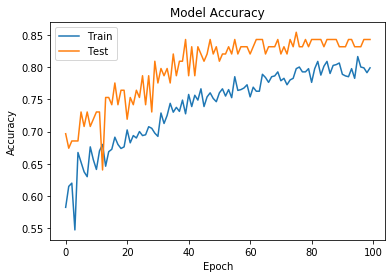

In [41]:
plt.plot(relu_adam_model_history.history['accuracy'])
plt.plot(relu_adam_model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# Best Accuracy so far

In [26]:
relu_adam_model_01 = Sequential()
relu_adam_model_01.add(Dense(256,input_dim=8,activation='relu'))
relu_adam_model_01.add(Dropout(0.2))
relu_adam_model_01.add(Dense(256,activation='relu'))
relu_adam_model_01.add(Dropout(0.2))
relu_adam_model_01.add(Dense(1,activation = 'sigmoid'))

In [27]:
adam = optimizers.Adam(learning_rate=0.01)

In [28]:
relu_adam_model_01.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
relu_adam_model_01_history = relu_adam_model_01.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/50
800/800 [==============================] - 0s 606us/step - loss: 8.6617 - accuracy: 0.4000 - val_loss: 10.0312 - val_accuracy: 0.3708
Epoch 2/50
800/800 [==============================] - 0s 62us/step - loss: 9.8245 - accuracy: 0.3837 - val_loss: 10.0312 - val_accuracy: 0.3708
Epoch 3/50
800/800 [==============================] - 0s 66us/step - loss: 9.8245 - accuracy: 0.3837 - val_loss: 10.0312 - val_accuracy: 0.3708
Epoch 4/50
800/800 [==============================] - 0s 76us/step - loss: 9.8245 - accuracy: 0.3837 - val_loss: 10.0312 - val_accuracy: 0.3708
Epoch 5/50
800/800 [==============================] - 0s 60us/step - loss: 9.8245 - accuracy: 0.3837 - val_loss: 10.0312 - val_accuracy: 0.3708
Epoch 6/50
800/800 [==============================] - 0s 89us/step - loss: 9.8245 - accuracy: 0.3837 - val_loss: 10.0312 - val_accuracy: 0.3708
Epoch 7/50
800/800 [==============================] - 0s 59us/step - loss: 9.8245 - accura

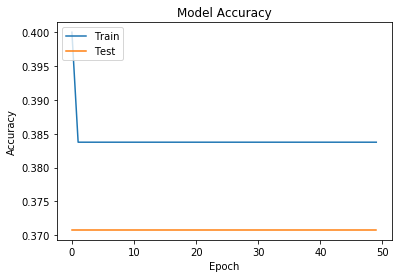

In [30]:
plt.plot(relu_adam_model_01_history.history['accuracy'])
plt.plot(relu_adam_model_01_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [42]:
test_data = pd.read_csv('../titanic/cleaned_test.csv')
passengerID = test_data['PassengerId']
test_data.drop('PassengerId',axis = 1 , inplace=True)


In [43]:
predictions = relu_adam_model.predict(test_data) 
predictions

array([[0.07849133],
       [0.36766016],
       [0.03995687],
       [0.08047646],
       [0.52793974],
       [0.16978014],
       [0.6490154 ],
       [0.1668283 ],
       [0.59249413],
       [0.16054988],
       [0.08536673],
       [0.2000078 ],
       [0.8181751 ],
       [0.12847298],
       [0.9095223 ],
       [0.7374113 ],
       [0.12281796],
       [0.10238194],
       [0.5020225 ],
       [0.40982693],
       [0.35036844],
       [0.21680632],
       [0.84160495],
       [0.4215545 ],
       [0.88627756],
       [0.06082708],
       [0.79744446],
       [0.09474477],
       [0.27689743],
       [0.15171373],
       [0.12745422],
       [0.16968021],
       [0.52505136],
       [0.53146267],
       [0.33623034],
       [0.11863855],
       [0.62577164],
       [0.6494806 ],
       [0.08654496],
       [0.49653992],
       [0.06234556],
       [0.23607925],
       [0.06307244],
       [0.7342757 ],
       [0.8872632 ],
       [0.08292821],
       [0.21899468],
       [0.095

In [44]:
predict_df = pd.DataFrame(data=predictions,columns=['Surv'])
predict_df.head(10)
# submission = pd.concat([passenferID,predict_df],axis=1)

,Surv
0,0.078491
1,0.367660
2,0.039957
3,0.080476
4,0.527940
5,0.169780
6,0.649015
7,0.166828
8,0.592494
9,0.160550


In [45]:
predict_df.loc[(predict_df['Surv']>0.6),'Survived'] = 1
predict_df.loc[(predict_df['Surv']<=0.6),'Survived'] = 0


In [46]:
survived = predict_df['Survived']
survived.head(40)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    1.0
23    0.0
24    1.0
25    0.0
26    1.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    1.0
37    1.0
38    0.0
39    0.0
Name: Survived, dtype: float64

In [47]:
submission = pd.concat([passengerID,survived],axis=1)
submission.astype('int32')
submission.to_csv("../submissions/NN_submission2.csv", index = False)

In [48]:
relu_adam_model_0001 = Sequential()
relu_adam_model_0001.add(Dense(256,input_dim=8,activation='relu'))
relu_adam_model_0001.add(Dropout(0.2))
relu_adam_model_0001.add(Dense(256,activation='relu'))
relu_adam_model_0001.add(Dropout(0.2))
relu_adam_model_0001.add(Dense(1,activation = 'softmax'))

In [49]:
adam_0001 = optimizers.Adam(learning_rate=0.0001)

In [52]:
relu_adam_model_0001.compile(optimizer=adam_0001,loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
relu_adam_model_0001_history = relu_adam_model_0001.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1)

Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 0s 663us/step - loss: 9.7647 - accuracy: 0.3875 - val_loss: 9.9640 - val_accuracy: 0.3750
Epoch 2/50
720/720 [==============================] - 0s 60us/step - loss: 9.7647 - accuracy: 0.3875 - val_loss: 9.9640 - val_accuracy: 0.3750
Epoch 3/50
720/720 [==============================] - 0s 67us/step - loss: 9.7647 - accuracy: 0.3875 - val_loss: 9.9640 - val_accuracy: 0.3750
Epoch 4/50
720/720 [==============================] - 0s 66us/step - loss: 9.7647 - accuracy: 0.3875 - val_loss: 9.9640 - val_accuracy: 0.3750
Epoch 5/50
720/720 [==============================] - 0s 71us/step - loss: 9.7647 - accuracy: 0.3875 - val_loss: 9.9640 - val_accuracy: 0.3750
Epoch 6/50
720/720 [==============================] - 0s 67us/step - loss: 9.7647 - accuracy: 0.3875 - val_loss: 9.9640 - val_accuracy: 0.3750
Epoch 7/50
720/720 [==============================] - 0s 55us/step - loss: 9.7647 - accuracy: 0.